In [2]:
from material_class import Material, Fit, DataSet
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

from scipy.special import erf

from fit_types import Nppoly, polylog, loglog_func, linear_fit
from tc_utils import *

material_of_interest = os.listdir("lib")
def set_parent(search_string, parent_string):
    for material in material_of_interest:
        if material.startswith(search_string):
            material_folder = os.path.join("lib", material)
            pickle_file = os.path.join(material_folder, "material.pkl")
            # Load the material of interest from the saved pickle file
            testmat = pickle.load(open(pickle_file, "rb"))
            testmat.parent=parent_string
            with open(pickle_file, "wb") as f:
                pickle.dump(testmat, f)

set_parent("Aluminum_", "Aluminum")
set_parent("CFRP_", "CFRP")
set_parent("G10_", "G10_parent")
set_parent("Graphite_", "Graphite")
set_parent("Nickel_Steel_", "Nickel_Steel")
set_parent("Polystyrene_", "Polystyrene")
set_parent("Polyurethane_", "Polyurethane")
set_parent("PVC_", "PVC")
set_parent("Stainless_Steel_", "Stainless_Steel")
set_parent("Wood_", "Wood")


Loading Kapton from pickle
lib\Kapton
[(np.float64(0.536), np.float64(307.0)), (4.0, 300.0)]
['Kapton_NIST', 'Kapton_data']
None


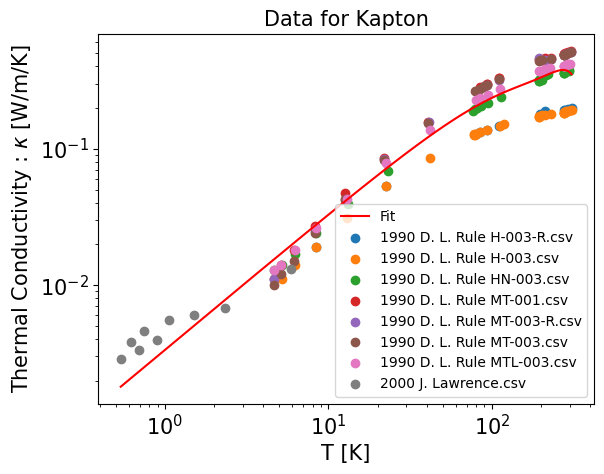

In [12]:
material_of_interest = "Kapton"#_Clearwater"


material_folder = os.path.join("lib", material_of_interest)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {material_of_interest} from pickle")
# Load the material of interest from the saved pickle file
testmat = pickle.load(open(pickle_file, "rb"))
print(testmat.folder)
print([fit.range for fit in testmat.fits])
# testmat.data_classes["Crowley_Clearwater_0.27K_2022.csv"].include=True
# testmat.data_classes["Crowley_Clearwater_0.36K_2022.csv"].include=True
testmat.update_fit("Nppoly", n_param=5)
print([fit.name for fit in testmat.fits])
print(testmat.parent)
testmat.plot_data_fit()
plt.show()

with open(pickle_file, "wb") as f:
    pickle.dump(testmat, f)

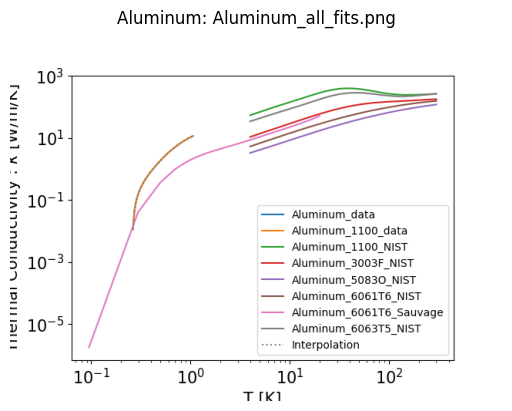

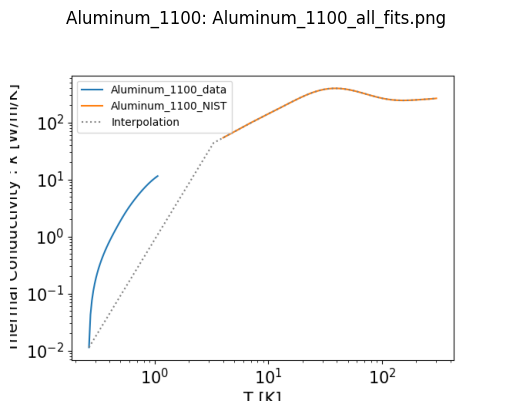

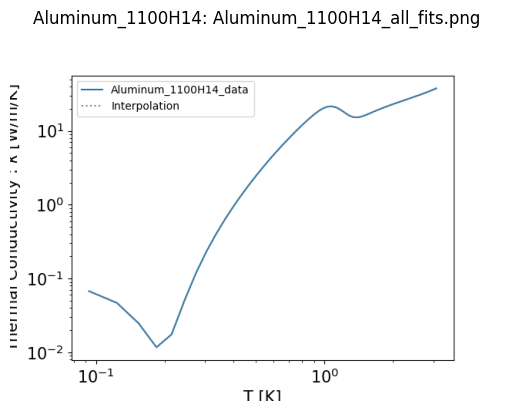

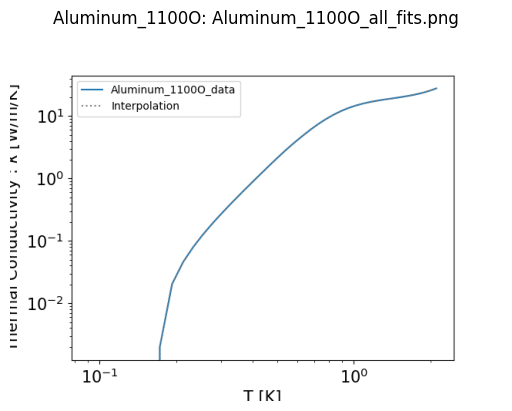

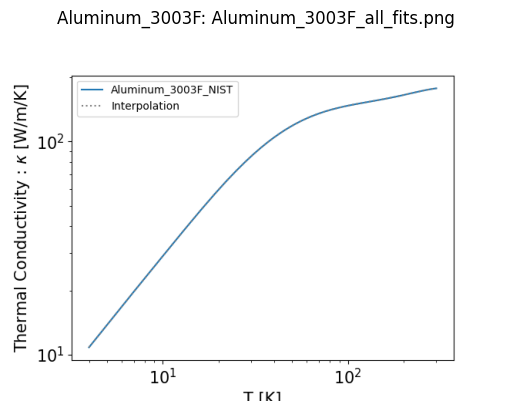

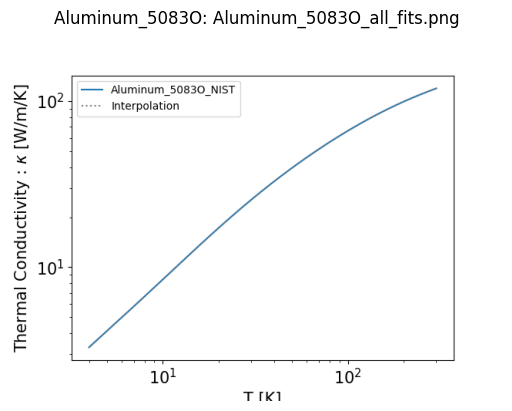

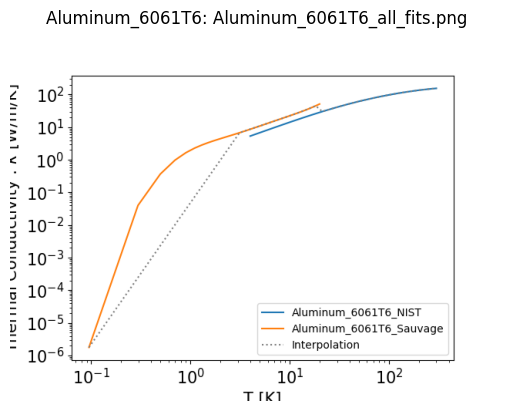

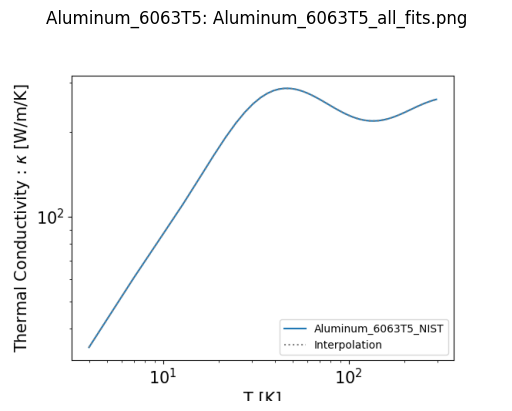

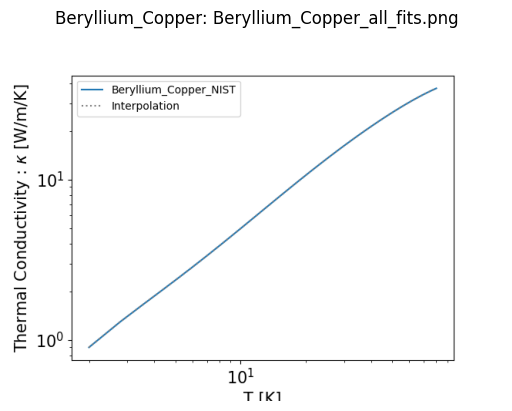

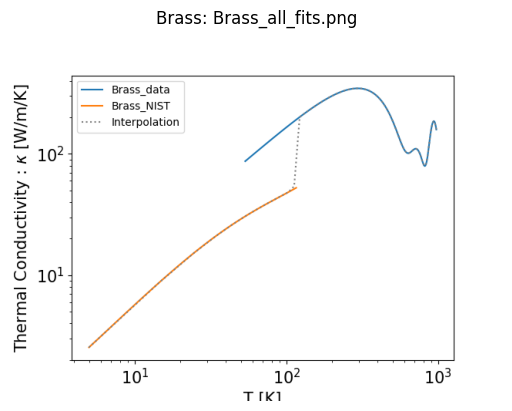

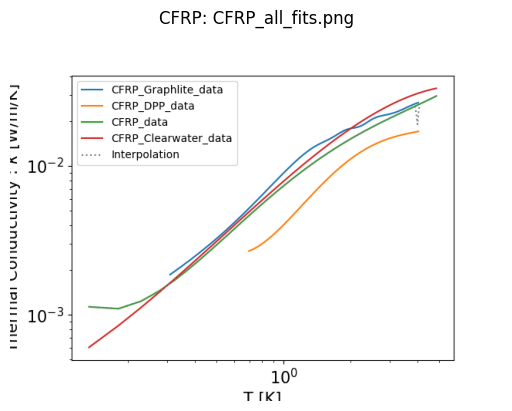

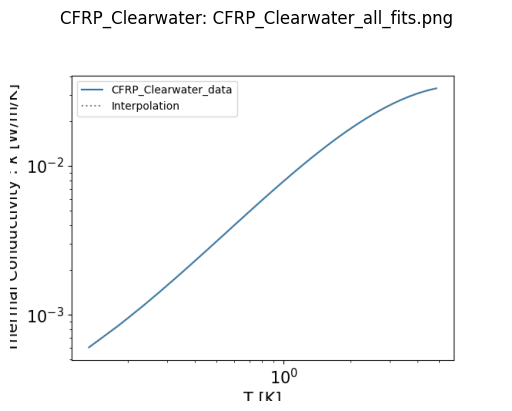

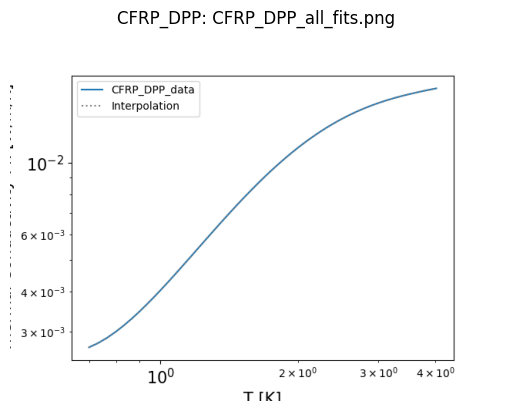

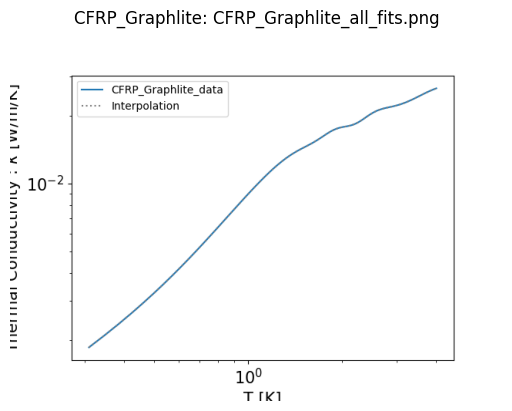

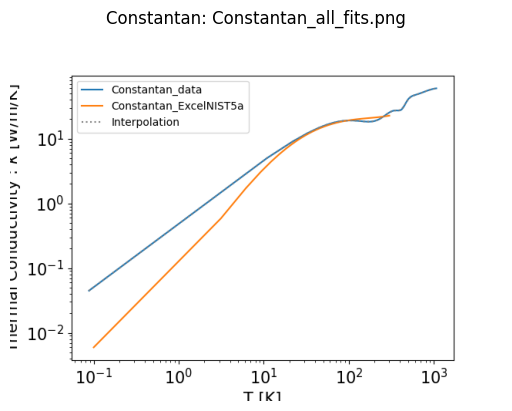

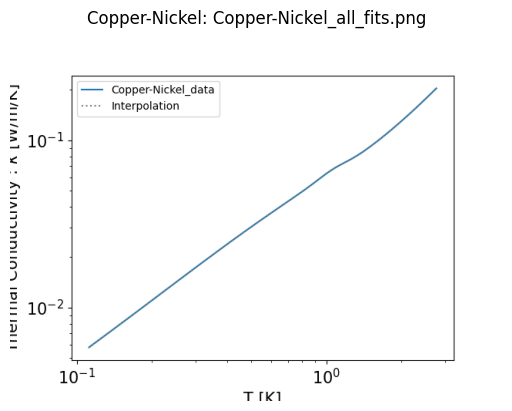

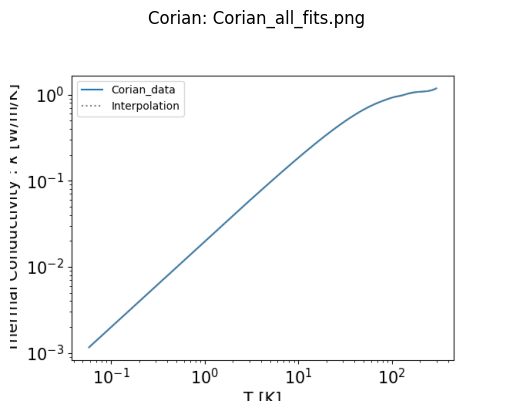

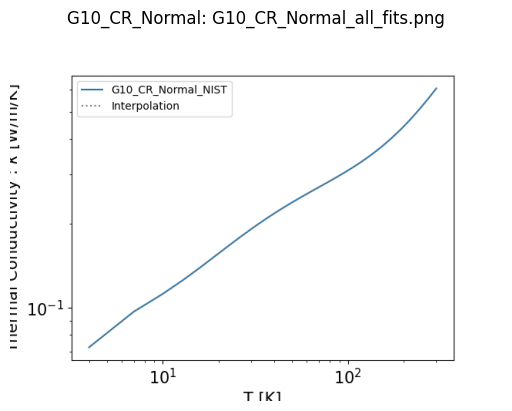

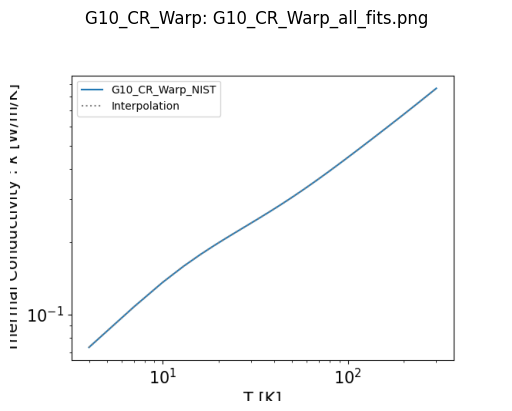

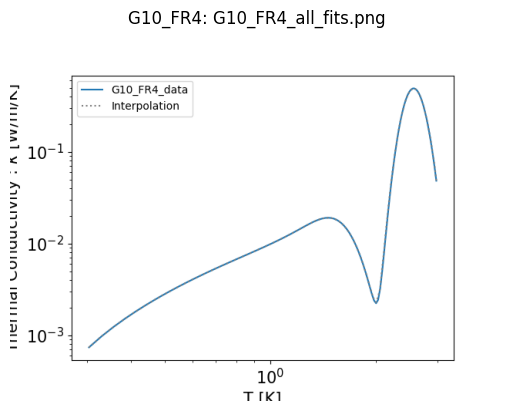

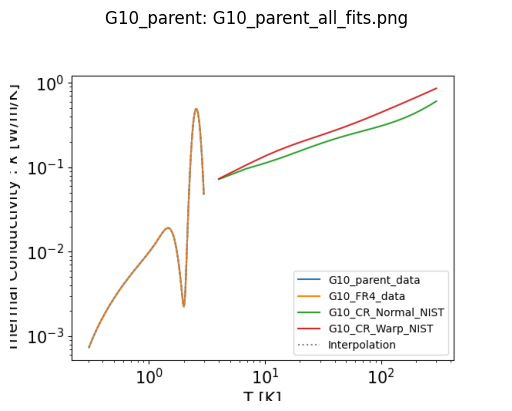

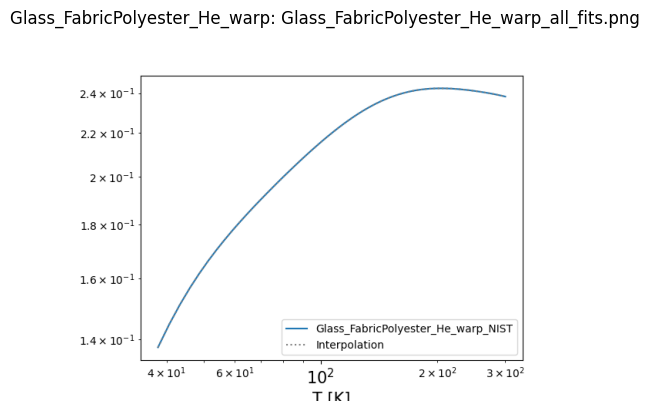

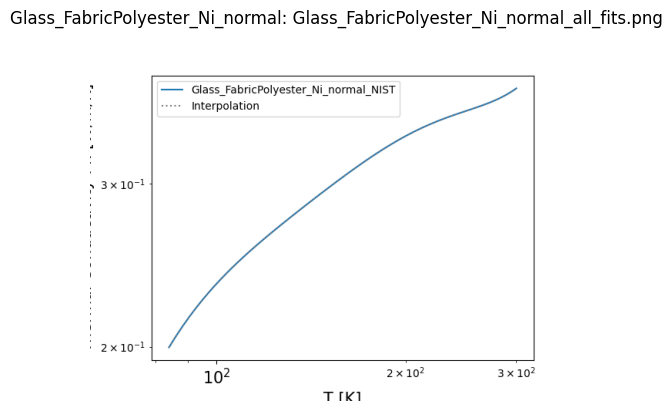

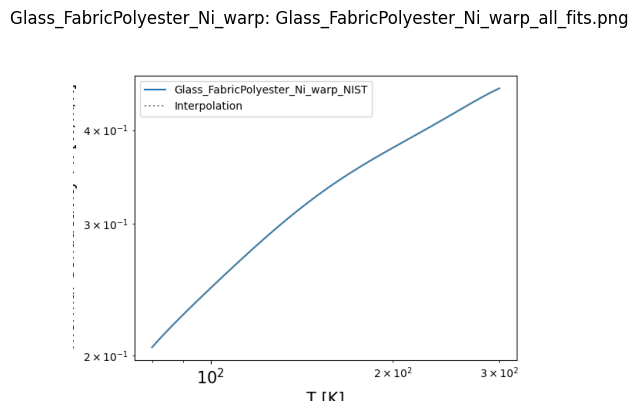

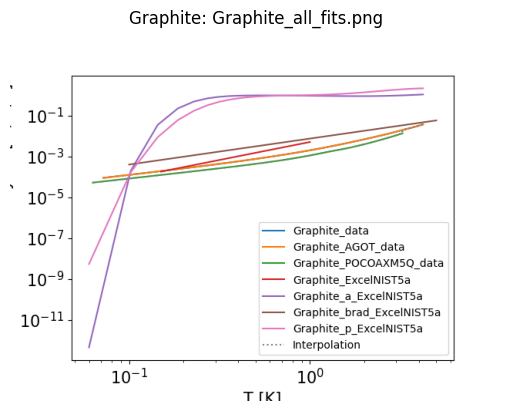

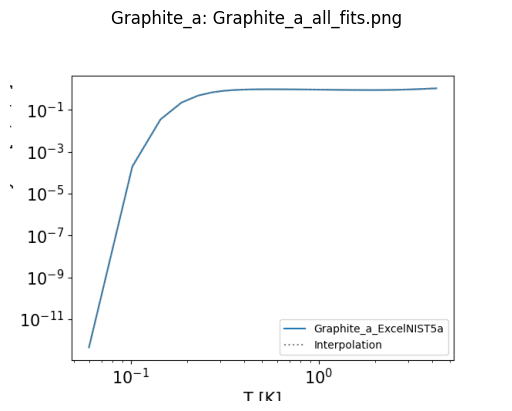

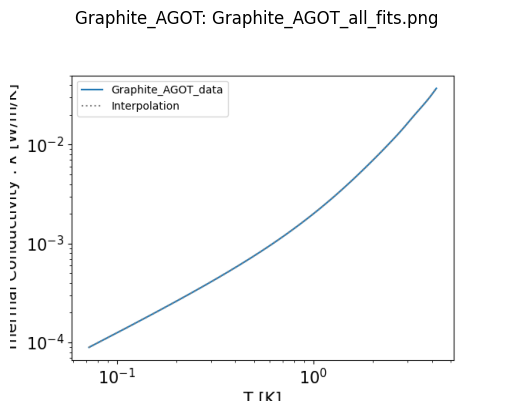

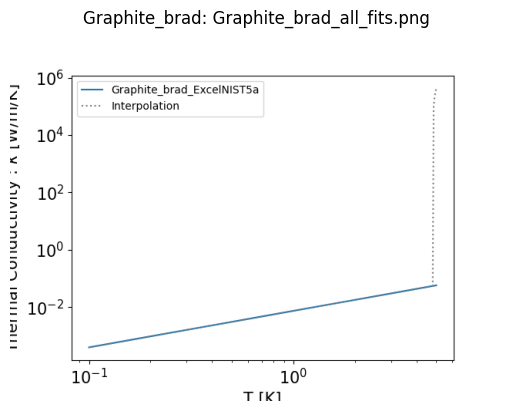

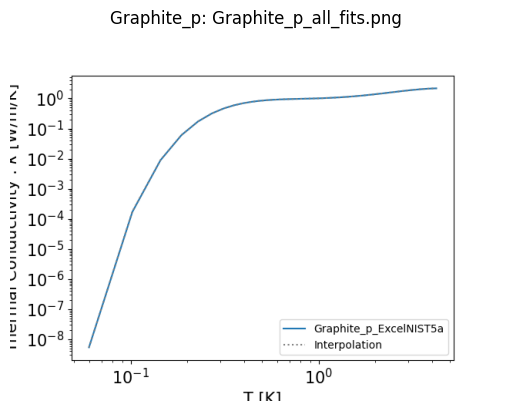

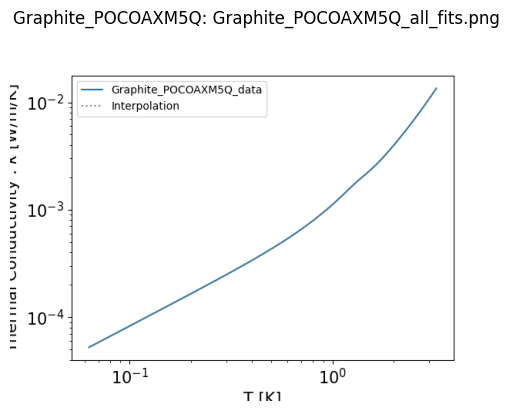

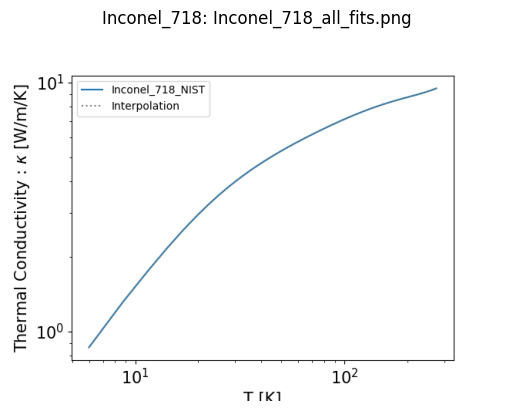

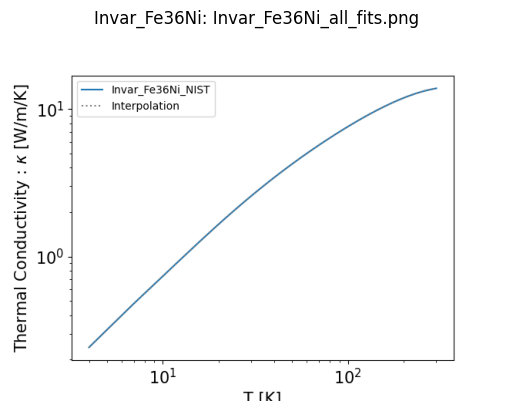

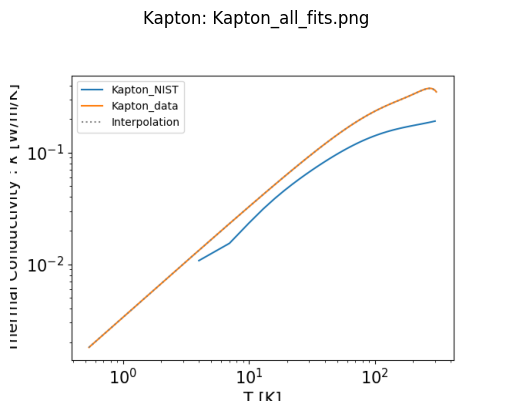

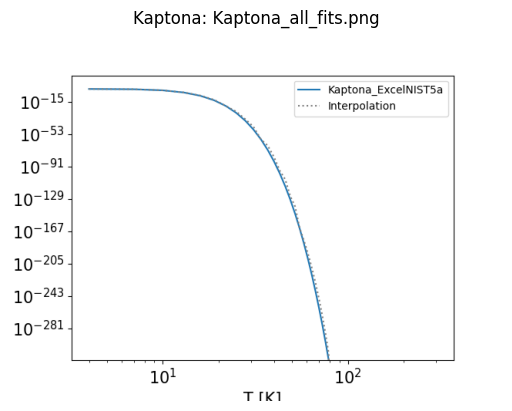

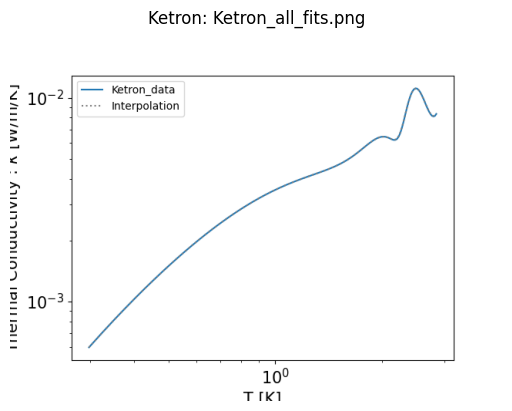

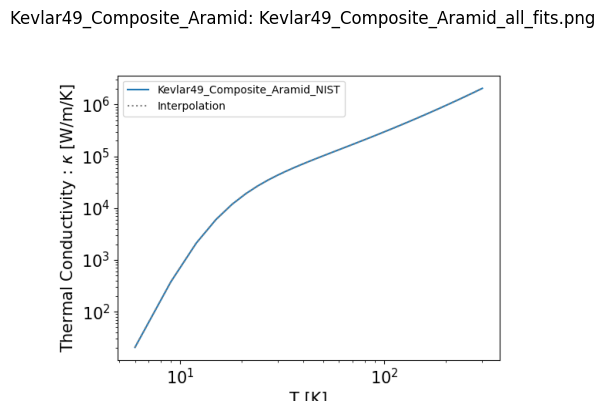

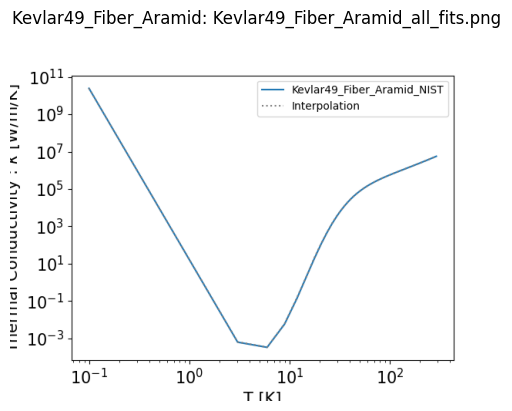

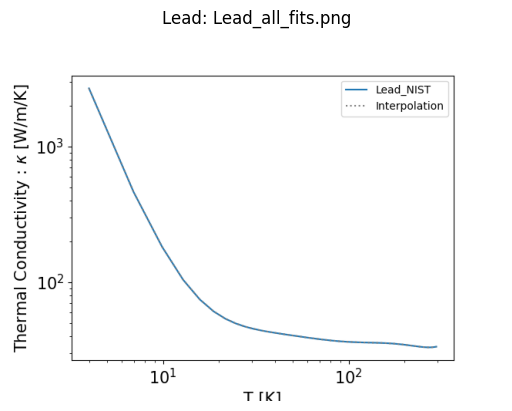

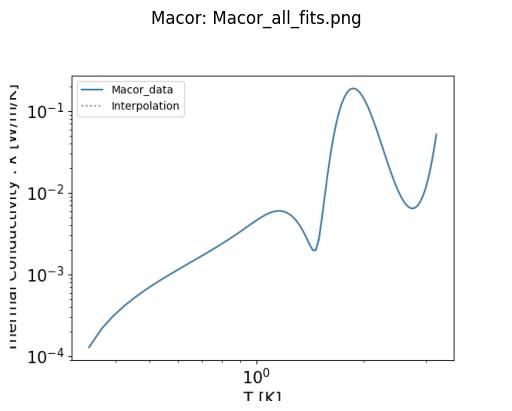

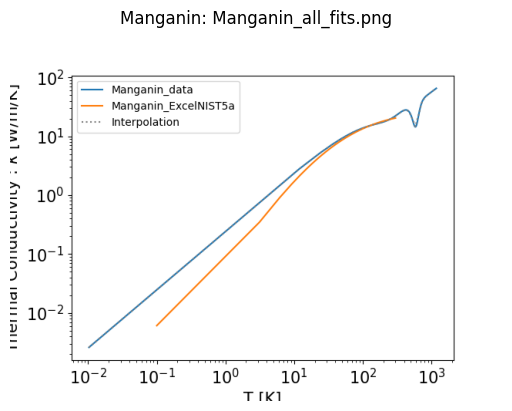

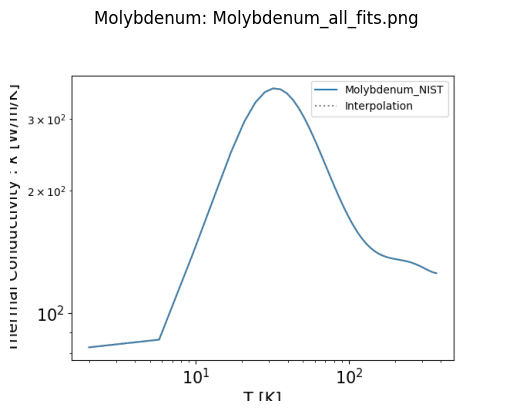

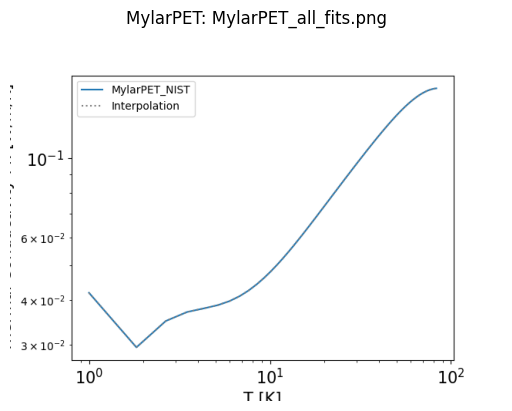

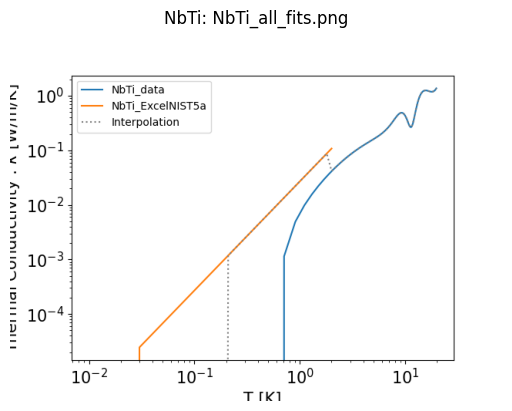

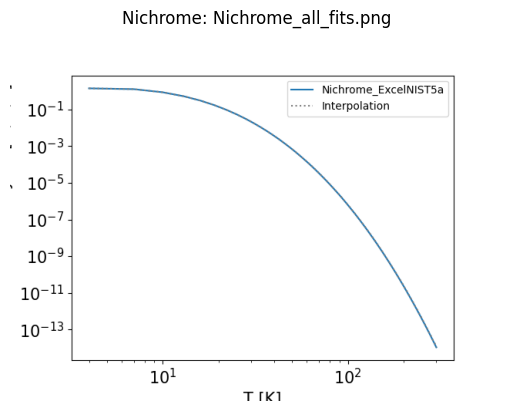

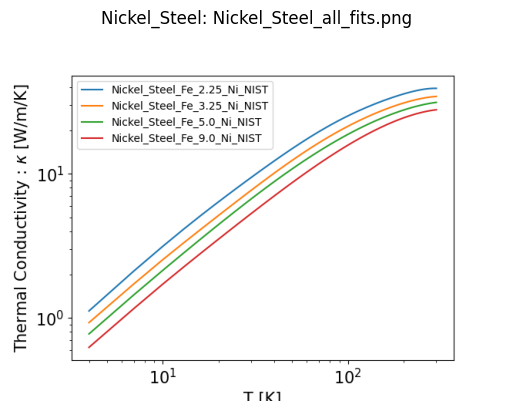

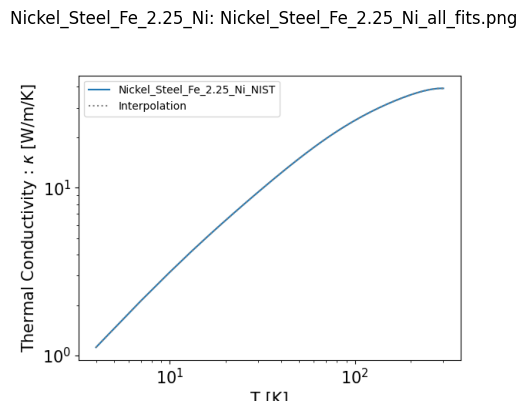

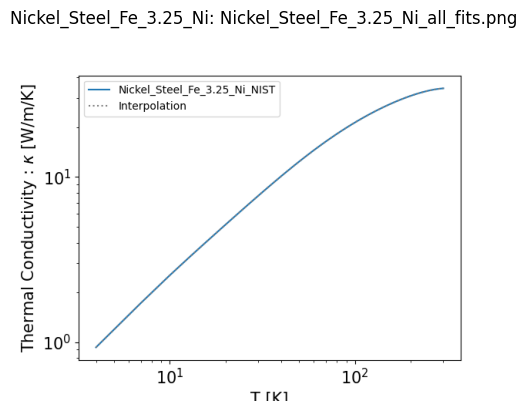

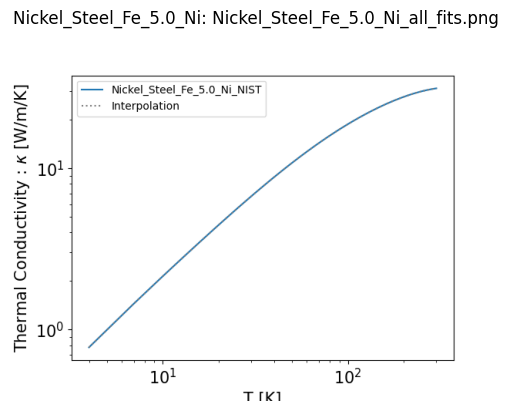

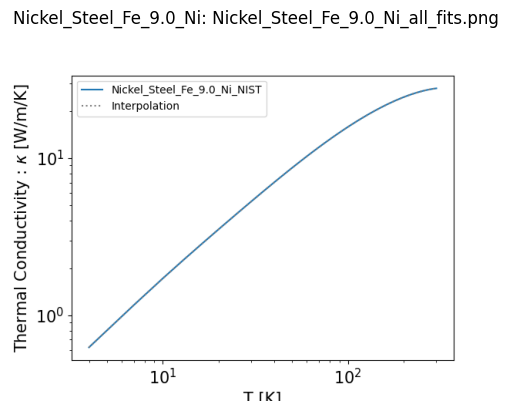

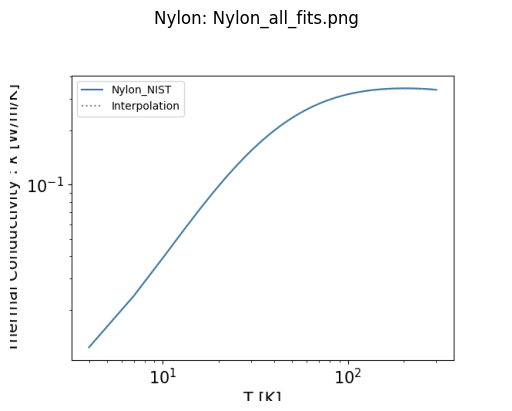

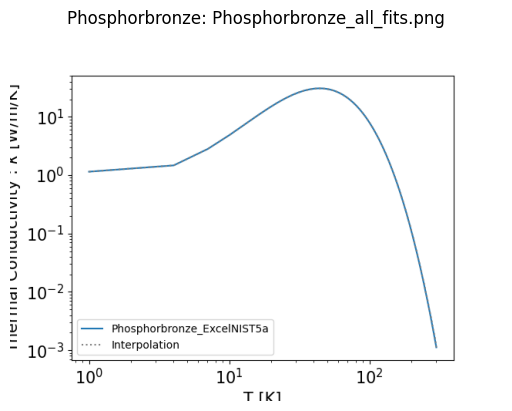

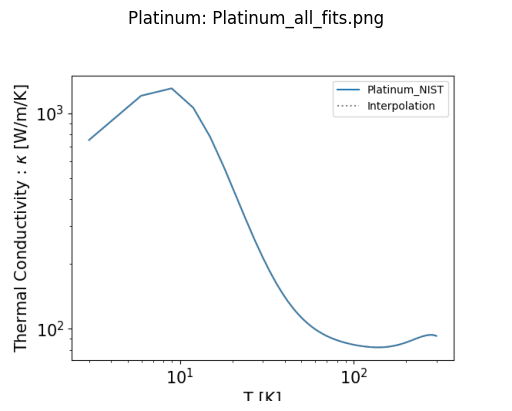

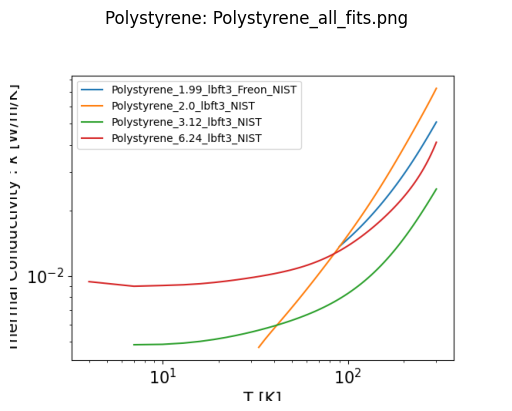

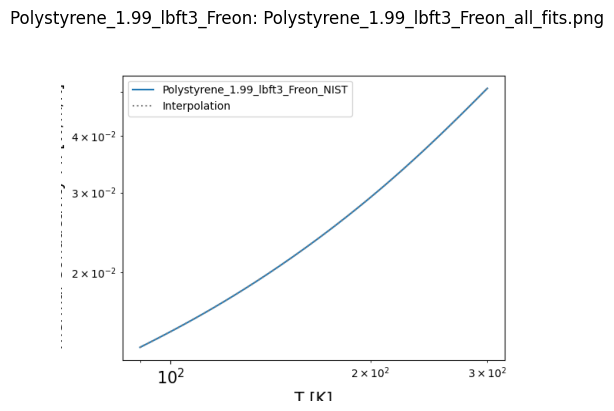

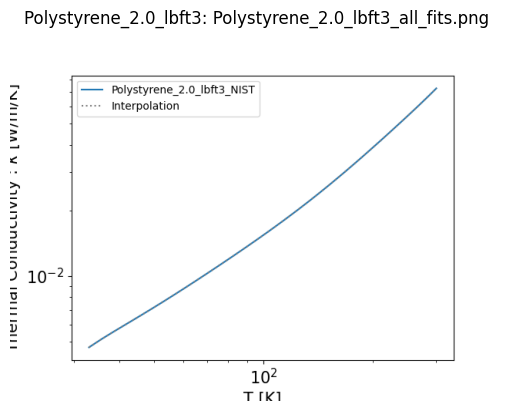

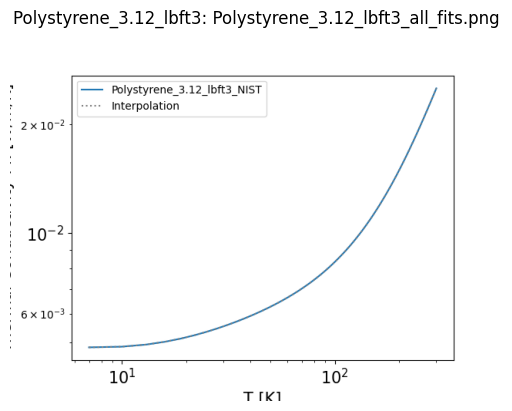

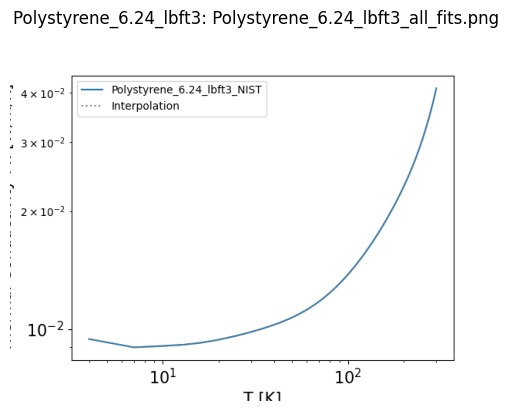

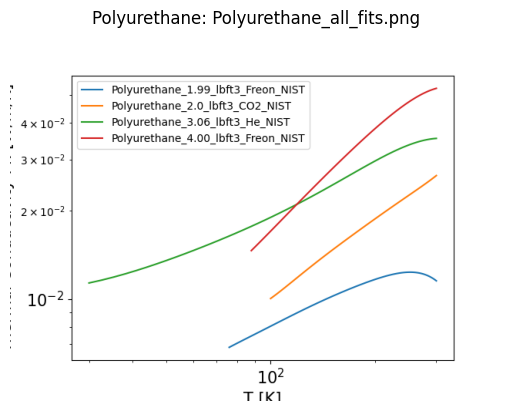

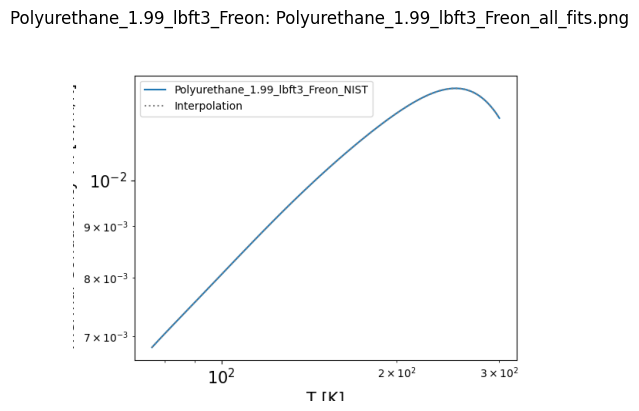

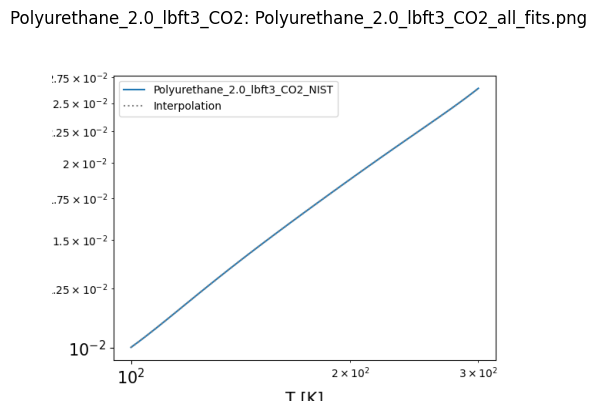

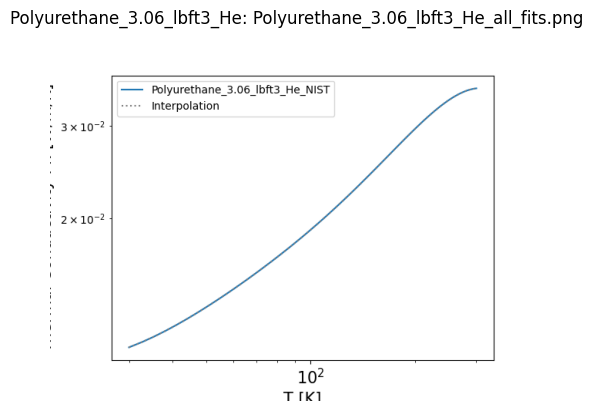

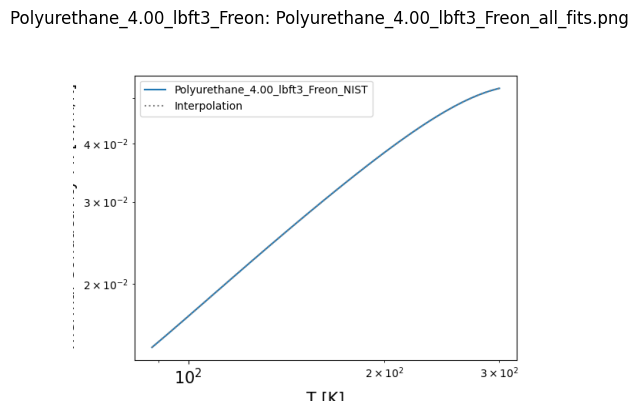

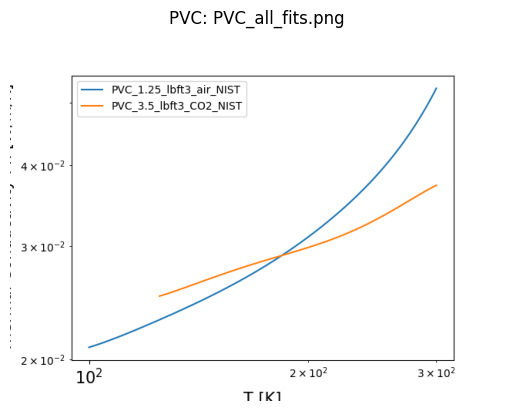

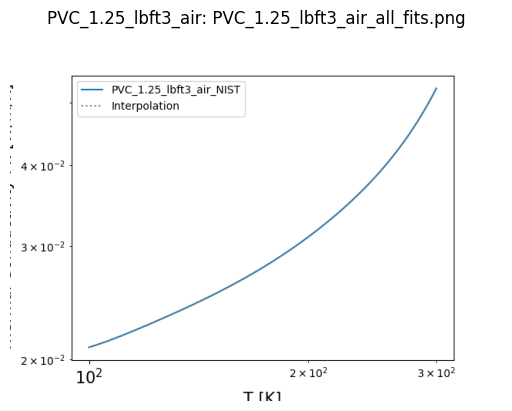

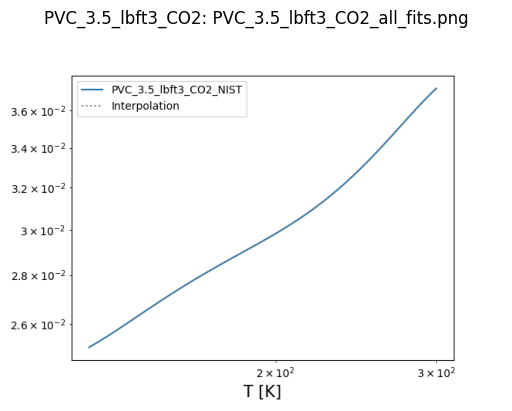

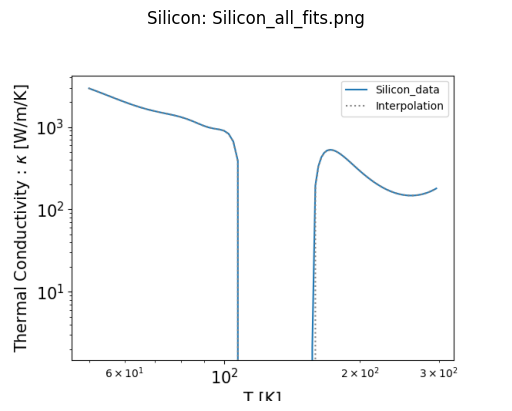

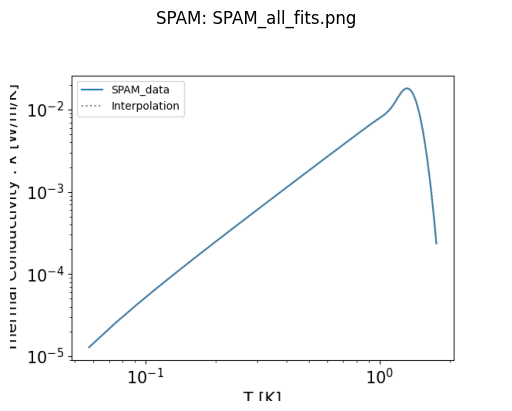

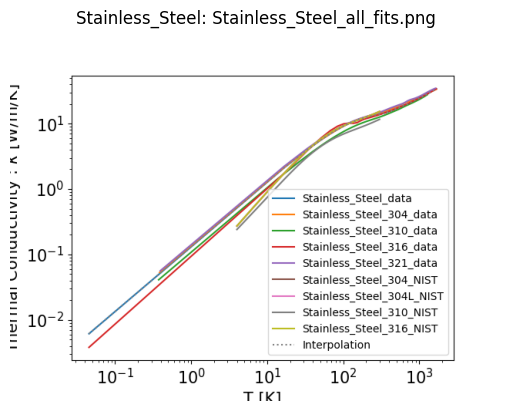

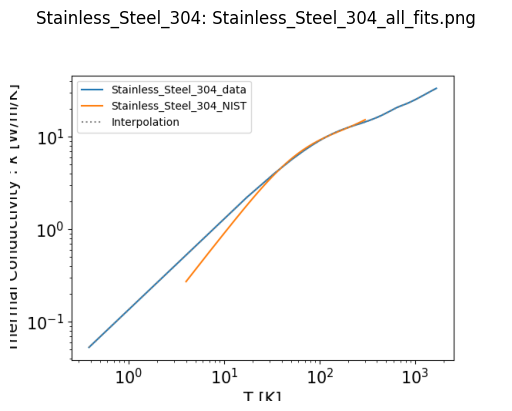

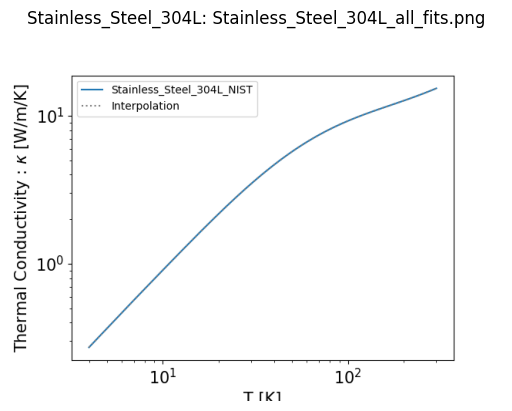

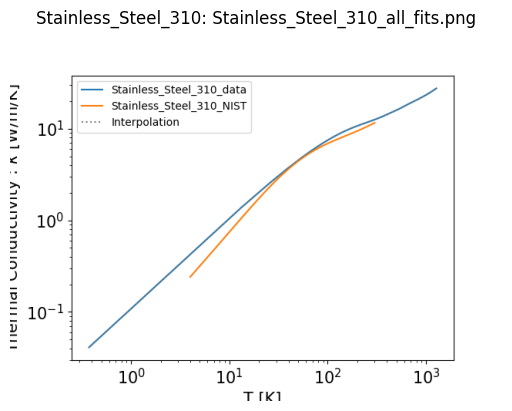

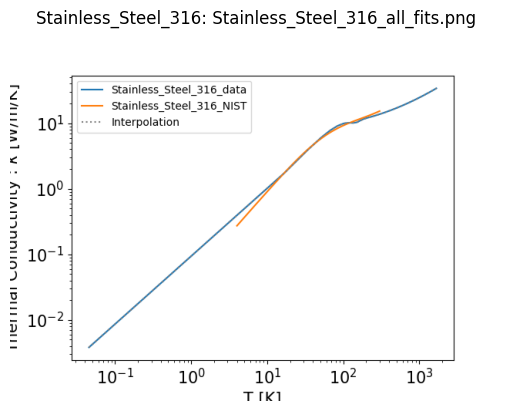

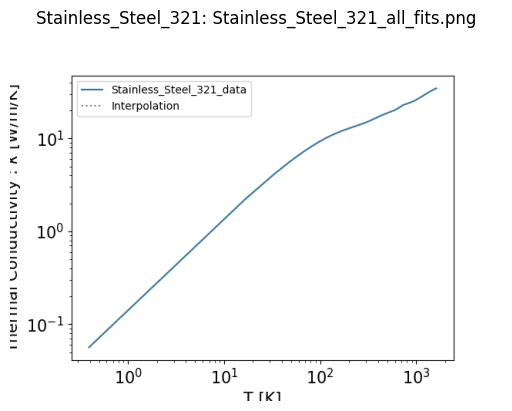

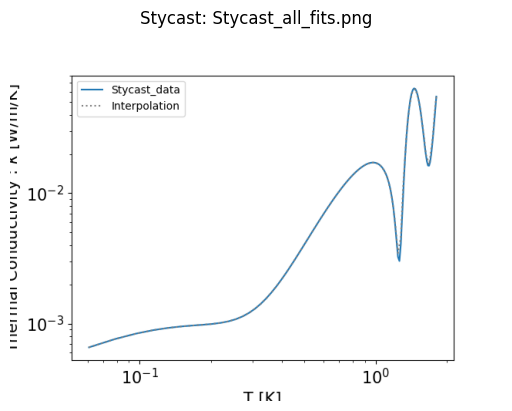

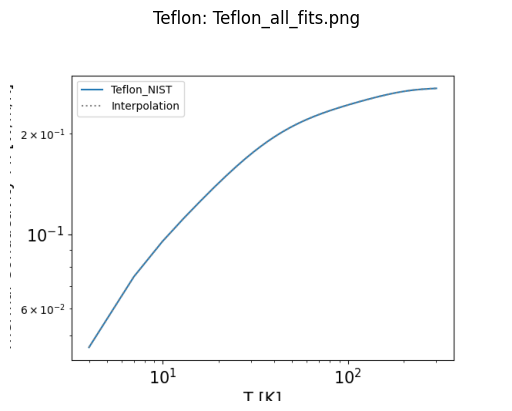

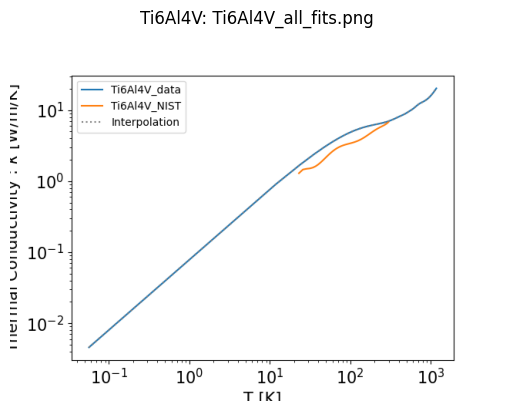

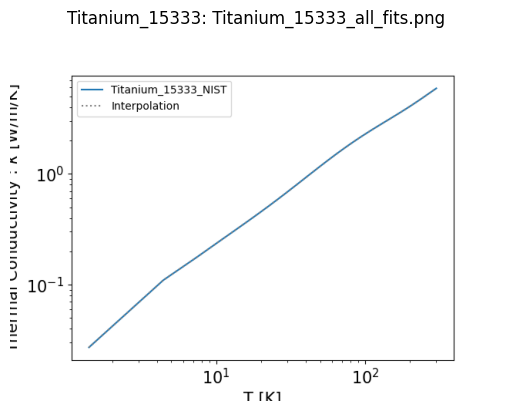

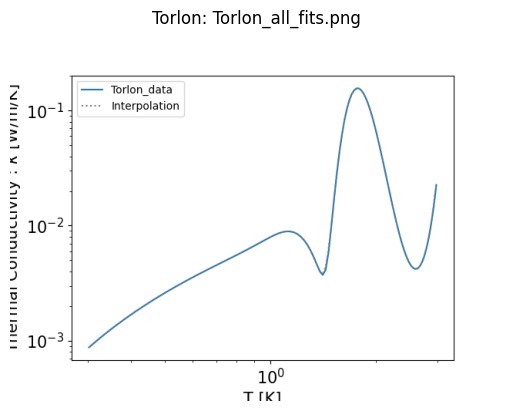

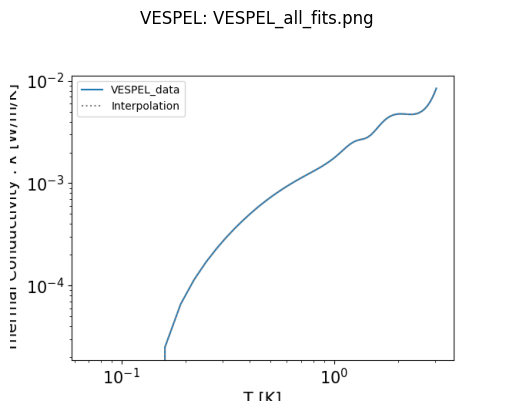

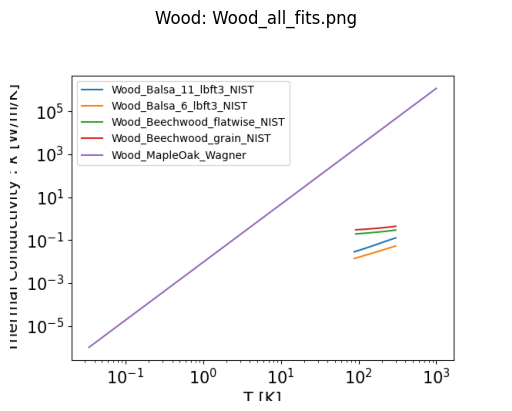

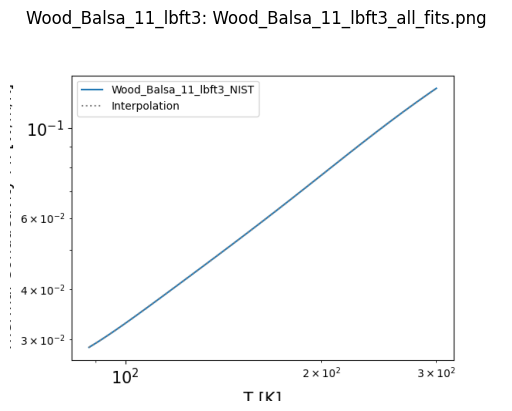

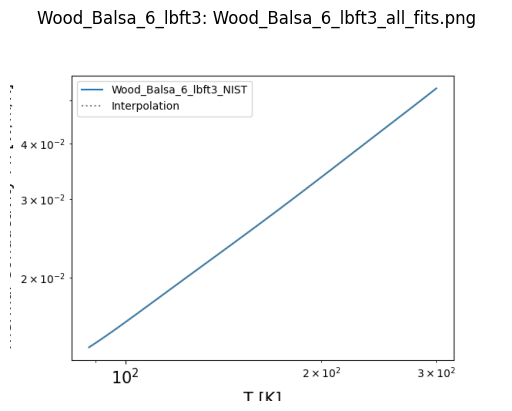

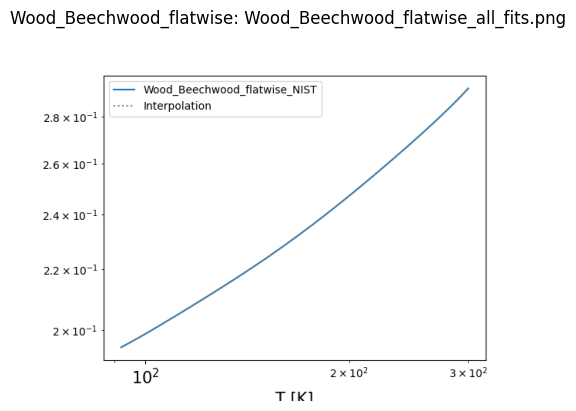

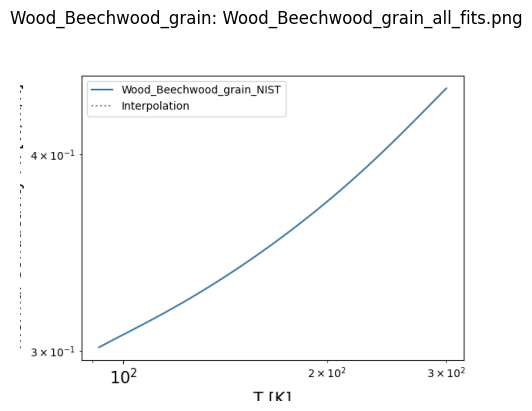

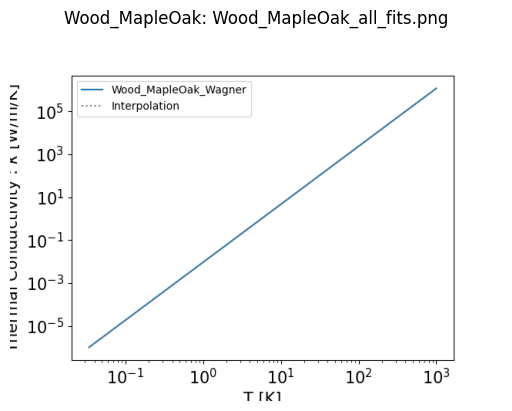

In [15]:
# Let's explore the all the plots to find any weird ones

folder_list = os.listdir("lib")
for folder in folder_list:
    plots_path = os.path.join("lib", folder, "PLOTS")
    if os.path.exists(plots_path):
        plot_list = os.listdir(plots_path)
        for plot in plot_list:
            if "all_fits" in plot:
                full_path = os.path.join(plots_path, plot)
                img = plt.imread(full_path)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"{folder}: {plot}")
                plt.show()